<h1>ENB42 - RNNs</h1>
<h2>LTSM layers </h2>

In [1]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

import numpy as np
import os
import csv

import pickle
import time as tm

import matplotlib.pyplot as plt
import pre_process as pp

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12586135666161658603]

<h2> Loading the datasets</h2>

In [3]:
with open('train_data.txt', 'rb') as fp:
    train_data = pickle.load(fp)
    
with open('train_labels.txt', 'rb') as fp:
    train_labels = pickle.load(fp)
    
with open('test_data.txt', 'rb') as fp:
    test_data = pickle.load(fp)
    
with open('test_labels.txt', 'rb') as fp:
    test_labels = pickle.load(fp)

<h2>k-fold params</h2>

In [4]:
k = 4
num_val_samples = len(train_data)
print(num_val_samples)
val_split_size = num_val_samples/k
val_split_size = int(val_split_size)
print(val_split_size)
type(val_split_size)

72
18


int

<h2>Experiment1: a single layer</h2>

In [29]:
net1 = models.Sequential()
net1.add(layers.GRU(360, return_sequences = True, input_shape = (480,6)))
net1.add(layers.GRU(360, return_sequences = True))
net1.add(layers.GRU(360))
net1.add(layers.Dense(7, activation = 'softmax'))
net1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 480, 360)          396360    
_________________________________________________________________
gru_7 (GRU)                  (None, 480, 360)          778680    
_________________________________________________________________
gru_8 (GRU)                  (None, 360)               778680    
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 2527      
Total params: 1,956,247
Trainable params: 1,956,247
Non-trainable params: 0
_________________________________________________________________


In [30]:
net1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net1.save_weights('net1.h5')  # each split will start with same weights so can directly compare results

In [31]:

histories1 = []
results_list1 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net1.load_weights('net1.h5')
    history = net1.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories1.append(history)
    
    
    results = net1.evaluate(test_data, test_labels)
    results_list1.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size
    
finish = tm.time()
duration1 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 16s 297ms/step - loss: 1.9379 - accuracy: 0.1481 - val_loss: 1.8267 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 16s 299ms/step - loss: 1.8749 - accuracy: 0.1296 - val_loss: 1.7585 - val_accuracy: 0.3333
Epoch 3/100
54/54 [==============================] - 16s 294ms/step - loss: 1.7791 - accuracy: 0.3889 - val_loss: 1.6490 - val_accuracy: 0.3333
Epoch 4/100
54/54 [==============================] - 16s 297ms/step - loss: 1.6536 - accuracy: 0.3519 - val_loss: 1.3660 - val_accuracy: 0.5556
Epoch 5/100
54/54 [==============================] - 16s 302ms/step - loss: 1.5704 - accuracy: 0.3148 - val_loss: 1.3762 - val_accuracy: 0.5000
Epoch 6/100
54/54 [==============================] - 16s 301ms/step - loss: 1.3657 - accuracy: 0.4074 - val_loss: 2.1458 - val_accuracy: 0.2778
Epoch 7/100
54/54 [==============================] - 17s 306ms/step - loss: 1.6195 - accur

54/54 [==============================] - 18s 335ms/step - loss: 0.2422 - accuracy: 0.9444 - val_loss: 0.7381 - val_accuracy: 0.6111
Epoch 58/100
54/54 [==============================] - 18s 331ms/step - loss: 0.1999 - accuracy: 0.9630 - val_loss: 0.6312 - val_accuracy: 0.7778
Epoch 59/100
54/54 [==============================] - 18s 334ms/step - loss: 0.1981 - accuracy: 0.9630 - val_loss: 0.5604 - val_accuracy: 0.8333
Epoch 60/100
54/54 [==============================] - 18s 338ms/step - loss: 0.1886 - accuracy: 0.9630 - val_loss: 0.5663 - val_accuracy: 0.7778
Epoch 61/100
54/54 [==============================] - 18s 336ms/step - loss: 0.1464 - accuracy: 0.9630 - val_loss: 0.5917 - val_accuracy: 0.7778
Epoch 62/100
54/54 [==============================] - 18s 339ms/step - loss: 0.1166 - accuracy: 0.9815 - val_loss: 0.5781 - val_accuracy: 0.7222
Epoch 63/100
54/54 [==============================] - 18s 341ms/step - loss: 0.1130 - accuracy: 0.9815 - val_loss: 0.6274 - val_accuracy: 0.777

Epoch 13/100
54/54 [==============================] - 21s 388ms/step - loss: 1.8292 - accuracy: 0.3519 - val_loss: 1.7170 - val_accuracy: 0.3333
Epoch 14/100
54/54 [==============================] - 21s 387ms/step - loss: 1.8120 - accuracy: 0.3519 - val_loss: 1.6908 - val_accuracy: 0.3333
Epoch 15/100
54/54 [==============================] - 21s 389ms/step - loss: 1.7886 - accuracy: 0.3519 - val_loss: 1.6637 - val_accuracy: 0.5000
Epoch 16/100
54/54 [==============================] - 21s 390ms/step - loss: 1.7563 - accuracy: 0.4630 - val_loss: 1.6316 - val_accuracy: 0.4444
Epoch 17/100
54/54 [==============================] - 21s 384ms/step - loss: 1.7182 - accuracy: 0.4444 - val_loss: 1.5897 - val_accuracy: 0.5556
Epoch 18/100
54/54 [==============================] - 21s 391ms/step - loss: 1.6637 - accuracy: 0.4630 - val_loss: 1.5220 - val_accuracy: 0.5000
Epoch 19/100
54/54 [==============================] - 21s 391ms/step - loss: 1.5885 - accuracy: 0.5370 - val_loss: 1.4318 - val_ac

54/54 [==============================] - 22s 407ms/step - loss: 0.3150 - accuracy: 0.8333 - val_loss: 0.3497 - val_accuracy: 0.8333
Epoch 70/100
54/54 [==============================] - 22s 415ms/step - loss: 0.2692 - accuracy: 0.8704 - val_loss: 0.4480 - val_accuracy: 0.6667
Epoch 71/100
54/54 [==============================] - 22s 415ms/step - loss: 0.2918 - accuracy: 0.8704 - val_loss: 0.8999 - val_accuracy: 0.6667
Epoch 72/100
54/54 [==============================] - 22s 416ms/step - loss: 0.4478 - accuracy: 0.8519 - val_loss: 0.9178 - val_accuracy: 0.7778
Epoch 73/100
54/54 [==============================] - 22s 413ms/step - loss: 1.1669 - accuracy: 0.6667 - val_loss: 2.4058 - val_accuracy: 0.4444
Epoch 74/100
54/54 [==============================] - 22s 414ms/step - loss: 2.1970 - accuracy: 0.5185 - val_loss: 1.2692 - val_accuracy: 0.5556
Epoch 75/100
54/54 [==============================] - 23s 417ms/step - loss: 0.9593 - accuracy: 0.6111 - val_loss: 0.9728 - val_accuracy: 0.555

Epoch 25/100
54/54 [==============================] - 23s 431ms/step - loss: 1.1801 - accuracy: 0.5185 - val_loss: 1.7372 - val_accuracy: 0.2222
Epoch 26/100
54/54 [==============================] - 24s 436ms/step - loss: 1.1524 - accuracy: 0.5185 - val_loss: 1.6445 - val_accuracy: 0.2222
Epoch 27/100
54/54 [==============================] - 23s 433ms/step - loss: 1.1471 - accuracy: 0.5741 - val_loss: 1.7069 - val_accuracy: 0.1667
Epoch 28/100
54/54 [==============================] - 23s 431ms/step - loss: 1.2437 - accuracy: 0.4630 - val_loss: 1.4719 - val_accuracy: 0.5000
Epoch 29/100
54/54 [==============================] - 23s 432ms/step - loss: 1.0591 - accuracy: 0.5185 - val_loss: 1.5392 - val_accuracy: 0.1667
Epoch 30/100
54/54 [==============================] - 23s 435ms/step - loss: 1.0407 - accuracy: 0.5185 - val_loss: 1.4216 - val_accuracy: 0.3889
Epoch 31/100
54/54 [==============================] - 23s 432ms/step - loss: 1.1763 - accuracy: 0.6111 - val_loss: 1.7684 - val_ac

54/54 [==============================] - 24s 443ms/step - loss: 0.2040 - accuracy: 0.9630 - val_loss: 0.8072 - val_accuracy: 0.7222
Epoch 82/100
54/54 [==============================] - 24s 441ms/step - loss: 0.1655 - accuracy: 0.9815 - val_loss: 0.6400 - val_accuracy: 0.7778
Epoch 83/100
54/54 [==============================] - 24s 447ms/step - loss: 0.1346 - accuracy: 0.9815 - val_loss: 0.6190 - val_accuracy: 0.8333
Epoch 84/100
54/54 [==============================] - 24s 444ms/step - loss: 0.1128 - accuracy: 0.9815 - val_loss: 0.7042 - val_accuracy: 0.8333
Epoch 85/100
54/54 [==============================] - 24s 445ms/step - loss: 0.1074 - accuracy: 0.9815 - val_loss: 0.8318 - val_accuracy: 0.7778
Epoch 86/100
54/54 [==============================] - 24s 445ms/step - loss: 0.1090 - accuracy: 1.0000 - val_loss: 0.8518 - val_accuracy: 0.6667
Epoch 87/100
54/54 [==============================] - 24s 446ms/step - loss: 0.1323 - accuracy: 0.9444 - val_loss: 0.9392 - val_accuracy: 0.777

54/54 [==============================] - 25s 454ms/step - loss: 0.9890 - accuracy: 0.5370 - val_loss: 1.4783 - val_accuracy: 0.2778
Epoch 37/100
54/54 [==============================] - 25s 455ms/step - loss: 0.9403 - accuracy: 0.5370 - val_loss: 1.5837 - val_accuracy: 0.2778
Epoch 38/100
54/54 [==============================] - 25s 456ms/step - loss: 0.9412 - accuracy: 0.5370 - val_loss: 1.5775 - val_accuracy: 0.3333
Epoch 39/100
54/54 [==============================] - 24s 452ms/step - loss: 0.9112 - accuracy: 0.5556 - val_loss: 1.4305 - val_accuracy: 0.3333
Epoch 40/100
54/54 [==============================] - 24s 453ms/step - loss: 0.8618 - accuracy: 0.6111 - val_loss: 1.2555 - val_accuracy: 0.5556
Epoch 41/100
54/54 [==============================] - 24s 453ms/step - loss: 0.8491 - accuracy: 0.5926 - val_loss: 1.1987 - val_accuracy: 0.5556
Epoch 42/100
54/54 [==============================] - 24s 453ms/step - loss: 0.8291 - accuracy: 0.5741 - val_loss: 1.2628 - val_accuracy: 0.555

54/54 [==============================] - 25s 460ms/step - loss: 0.0919 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.7222
Epoch 93/100
54/54 [==============================] - 25s 456ms/step - loss: 0.0678 - accuracy: 1.0000 - val_loss: 1.3778 - val_accuracy: 0.7222
Epoch 94/100
54/54 [==============================] - 25s 459ms/step - loss: 0.0581 - accuracy: 1.0000 - val_loss: 1.3665 - val_accuracy: 0.7778
Epoch 95/100
54/54 [==============================] - 25s 460ms/step - loss: 0.0477 - accuracy: 1.0000 - val_loss: 1.2948 - val_accuracy: 0.7778
Epoch 96/100
54/54 [==============================] - 25s 460ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 1.2373 - val_accuracy: 0.7778
Epoch 97/100
54/54 [==============================] - 25s 463ms/step - loss: 0.0321 - accuracy: 1.0000 - val_loss: 1.2017 - val_accuracy: 0.7778
Epoch 98/100
54/54 [==============================] - 25s 465ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 1.2316 - val_accuracy: 0.777

In [32]:
avg = np.mean(results_list1, axis=0)
std_dev = np.std(results_list1, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration1))

Average loss and accuracy scores were:  [1.18552811 0.78333335]
Standard deviation for loss & accuracy:  [0.28969856 0.08660254]
Duration in seconds:  8801


In [26]:
#net1.save('enb39-1.h5')

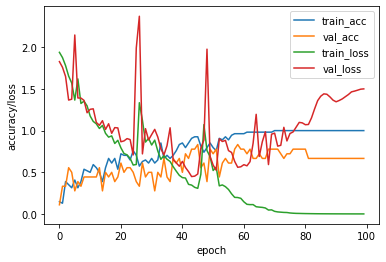

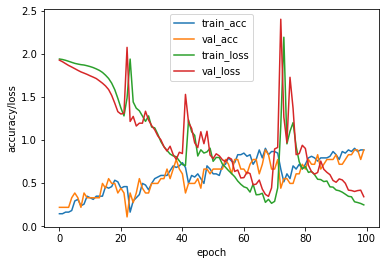

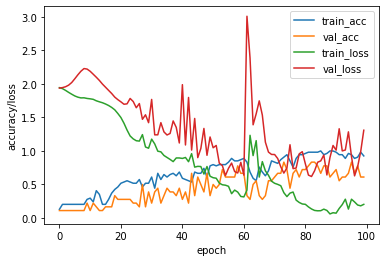

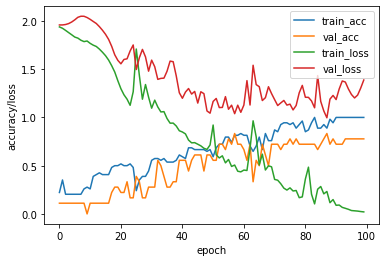

In [33]:
for history in histories1:
    pp.plot_hist(history)

<h2> Expriment2:</h2>

In [41]:
net2 = models.Sequential()
net2.add(layers.GRU(240, return_sequences = True, input_shape=(480,6)))
net2.add(layers.GRU(240))
net2.add(layers.Dense(240,  activation = 'relu'))
net2.add(layers.Dense(7, activation = 'softmax'))
net2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 480, 240)          177840    
_________________________________________________________________
gru_16 (GRU)                 (None, 240)               346320    
_________________________________________________________________
dense_23 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_24 (Dense)             (None, 7)                 1687      
Total params: 583,687
Trainable params: 583,687
Non-trainable params: 0
_________________________________________________________________


In [42]:
net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

In [43]:
#net2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#net2.save_weights('net2.h5')  # each split will start with same weights so can directly compare results

histories2 = []
results_list2 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net2.load_weights('net2.h5')
    history = net2.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories2.append(history)
    
    
    results = net2.evaluate(test_data, test_labels)
    results_list2.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration2 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 8s 148ms/step - loss: 1.9391 - accuracy: 0.1852 - val_loss: 1.9107 - val_accuracy: 0.1111
Epoch 2/100
54/54 [==============================] - 7s 136ms/step - loss: 1.9073 - accuracy: 0.1852 - val_loss: 1.8675 - val_accuracy: 0.1111
Epoch 3/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8737 - accuracy: 0.1852 - val_loss: 1.8318 - val_accuracy: 0.1111
Epoch 4/100
54/54 [==============================] - 7s 135ms/step - loss: 1.8371 - accuracy: 0.1852 - val_loss: 1.7955 - val_accuracy: 0.1111
Epoch 5/100
54/54 [==============================] - 7s 136ms/step - loss: 1.7754 - accuracy: 0.1852 - val_loss: 1.7375 - val_accuracy: 0.2222
Epoch 6/100
54/54 [==============================] - 7s 136ms/step - loss: 1.6630 - accuracy: 0.3333 - val_loss: 1.5777 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 7s 136ms/step - loss: 1.4679 - accuracy: 0.

54/54 [==============================] - 7s 137ms/step - loss: 0.7056 - accuracy: 0.7037 - val_loss: 0.9997 - val_accuracy: 0.4444
Epoch 58/100
54/54 [==============================] - 7s 136ms/step - loss: 0.5705 - accuracy: 0.7778 - val_loss: 1.7770 - val_accuracy: 0.3889
Epoch 59/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6122 - accuracy: 0.7407 - val_loss: 1.0406 - val_accuracy: 0.3889
Epoch 60/100
54/54 [==============================] - 7s 136ms/step - loss: 0.4498 - accuracy: 0.7778 - val_loss: 0.7687 - val_accuracy: 0.6667
Epoch 61/100
54/54 [==============================] - 7s 137ms/step - loss: 0.5277 - accuracy: 0.8333 - val_loss: 0.8901 - val_accuracy: 0.7222
Epoch 62/100
54/54 [==============================] - 7s 136ms/step - loss: 0.4237 - accuracy: 0.8519 - val_loss: 1.3052 - val_accuracy: 0.4444
Epoch 63/100
54/54 [==============================] - 7s 136ms/step - loss: 0.5042 - accuracy: 0.7963 - val_loss: 1.0928 - val_accuracy: 0.5000
Epoch

54/54 [==============================] - 7s 137ms/step - loss: 1.8882 - accuracy: 0.3519 - val_loss: 1.8345 - val_accuracy: 0.3333
Epoch 14/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8833 - accuracy: 0.2778 - val_loss: 1.8268 - val_accuracy: 0.2778
Epoch 15/100
54/54 [==============================] - 7s 137ms/step - loss: 1.8800 - accuracy: 0.2778 - val_loss: 1.8172 - val_accuracy: 0.2778
Epoch 16/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8748 - accuracy: 0.2778 - val_loss: 1.8082 - val_accuracy: 0.2778
Epoch 17/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8708 - accuracy: 0.2963 - val_loss: 1.8006 - val_accuracy: 0.2222
Epoch 18/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8665 - accuracy: 0.3519 - val_loss: 1.7905 - val_accuracy: 0.3889
Epoch 19/100
54/54 [==============================] - 7s 136ms/step - loss: 1.8619 - accuracy: 0.3704 - val_loss: 1.7822 - val_accuracy: 0.3889
Epoch

Epoch 70/100
54/54 [==============================] - 7s 135ms/step - loss: 0.7326 - accuracy: 0.7407 - val_loss: 0.6825 - val_accuracy: 0.7778
Epoch 71/100
54/54 [==============================] - 7s 136ms/step - loss: 0.7184 - accuracy: 0.7593 - val_loss: 0.5916 - val_accuracy: 0.8333
Epoch 72/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6927 - accuracy: 0.7037 - val_loss: 0.5479 - val_accuracy: 0.8333
Epoch 73/100
54/54 [==============================] - 7s 137ms/step - loss: 0.6927 - accuracy: 0.6481 - val_loss: 0.5690 - val_accuracy: 0.8333
Epoch 74/100
54/54 [==============================] - 7s 135ms/step - loss: 0.6228 - accuracy: 0.7778 - val_loss: 0.6497 - val_accuracy: 0.8333
Epoch 75/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6005 - accuracy: 0.7593 - val_loss: 0.6716 - val_accuracy: 0.7222
Epoch 76/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6496 - accuracy: 0.7407 - val_loss: 0.5194 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 7s 137ms/step - loss: 1.7360 - accuracy: 0.3889 - val_loss: 2.0723 - val_accuracy: 0.3333
Epoch 27/100
54/54 [==============================] - 7s 137ms/step - loss: 1.7278 - accuracy: 0.4074 - val_loss: 2.0539 - val_accuracy: 0.3333
Epoch 28/100
54/54 [==============================] - 7s 137ms/step - loss: 1.7195 - accuracy: 0.3889 - val_loss: 2.0364 - val_accuracy: 0.3333
Epoch 29/100
54/54 [==============================] - 7s 137ms/step - loss: 1.7102 - accuracy: 0.4259 - val_loss: 2.0216 - val_accuracy: 0.3333
Epoch 30/100
54/54 [==============================] - 7s 137ms/step - loss: 1.7002 - accuracy: 0.4259 - val_loss: 2.0076 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 7s 137ms/step - loss: 1.6894 - accuracy: 0.4074 - val_loss: 1.9937 - val_accuracy: 0.3333
Epoch 32/100
54/54 [==============================] - 7s 137ms/step - loss: 1.6781 - accuracy: 0.4259 - val_loss: 1.9788 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6502 - accuracy: 0.7963 - val_loss: 1.1635 - val_accuracy: 0.4444
Epoch 84/100
54/54 [==============================] - 7s 135ms/step - loss: 0.6284 - accuracy: 0.7593 - val_loss: 0.8393 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 7s 136ms/step - loss: 0.5684 - accuracy: 0.7407 - val_loss: 1.2859 - val_accuracy: 0.3889
Epoch 86/100
54/54 [==============================] - 7s 138ms/step - loss: 0.6112 - accuracy: 0.7593 - val_loss: 0.7323 - val_accuracy: 0.7222
Epoch 87/100
54/54 [==============================] - 7s 137ms/step - loss: 0.5905 - accuracy: 0.7593 - val_loss: 1.2806 - val_accuracy: 0.3889
Epoch 88/100
54/54 [==============================] - 7s 138ms/step - loss: 0.6352 - accuracy: 0.7407 - val_loss: 0.7327 - val_accuracy: 0.7222
Epoch 89/100
54/54 [==============================] - 7s 137ms/step - loss: 0.6342 - accuracy: 0.7037 - val_loss: 2.3659 - val_accuracy:

54/54 [==============================] - 7s 137ms/step - loss: 1.6851 - accuracy: 0.4074 - val_loss: 1.9489 - val_accuracy: 0.1111
Epoch 39/100
54/54 [==============================] - 7s 138ms/step - loss: 1.6713 - accuracy: 0.4074 - val_loss: 1.9376 - val_accuracy: 0.1111
Epoch 40/100
54/54 [==============================] - 7s 136ms/step - loss: 1.6570 - accuracy: 0.4074 - val_loss: 1.9211 - val_accuracy: 0.1111
Epoch 41/100
54/54 [==============================] - 7s 137ms/step - loss: 1.6419 - accuracy: 0.4074 - val_loss: 1.9060 - val_accuracy: 0.1111
Epoch 42/100
54/54 [==============================] - 7s 138ms/step - loss: 1.6242 - accuracy: 0.4074 - val_loss: 1.8902 - val_accuracy: 0.1111
Epoch 43/100
54/54 [==============================] - 7s 139ms/step - loss: 1.6030 - accuracy: 0.4074 - val_loss: 1.8770 - val_accuracy: 0.1111
Epoch 44/100
54/54 [==============================] - 7s 136ms/step - loss: 1.5811 - accuracy: 0.4074 - val_loss: 1.8580 - val_accuracy: 0.1111
Epoch

Epoch 95/100
54/54 [==============================] - 7s 137ms/step - loss: 0.7348 - accuracy: 0.6296 - val_loss: 1.3989 - val_accuracy: 0.3889
Epoch 96/100
54/54 [==============================] - 7s 136ms/step - loss: 0.7170 - accuracy: 0.6481 - val_loss: 1.3835 - val_accuracy: 0.3889
Epoch 97/100
54/54 [==============================] - 7s 137ms/step - loss: 0.7156 - accuracy: 0.6667 - val_loss: 1.3788 - val_accuracy: 0.3889
Epoch 98/100
54/54 [==============================] - 7s 136ms/step - loss: 0.7234 - accuracy: 0.6296 - val_loss: 1.4087 - val_accuracy: 0.3889
Epoch 99/100
54/54 [==============================] - 7s 136ms/step - loss: 0.6615 - accuracy: 0.6667 - val_loss: 1.5834 - val_accuracy: 0.2778
Epoch 100/100
15/15 [==============================] - 1s 45ms/step
[1.60825777053833, 0.6666666865348816]


In [44]:
avg = np.mean(results_list2, axis=0)
std_dev = np.std(results_list2, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration2))

Average loss and accuracy scores were:  [1.02993858 0.73333335]
Standard deviation for loss & accuracy:  [0.34268826 0.04714045]
Duration in seconds:  2953


In [45]:
#net2.save('enb38-2.h5')

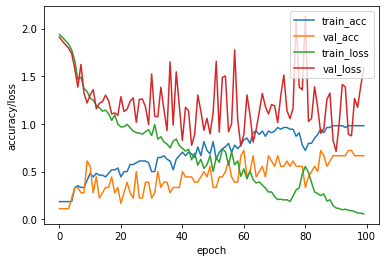

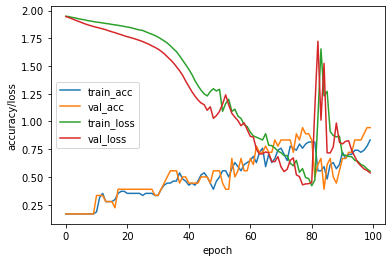

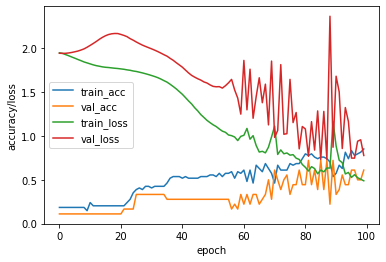

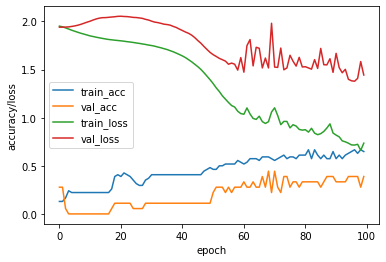

In [46]:
for history in histories2:
    pp.plot_hist(history)

<h2> Expriment3:</h2>

In [47]:
net3 = models.Sequential()
net3.add(layers.GRU(240, return_sequences = True, input_shape=(480,6)))
net3.add(layers.GRU(240))
net3.add(layers.Dense(120,  activation = 'relu'))
net3.add(layers.Dense(7, activation = 'softmax'))
net3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_17 (GRU)                 (None, 480, 240)          177840    
_________________________________________________________________
gru_18 (GRU)                 (None, 240)               346320    
_________________________________________________________________
dense_25 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_26 (Dense)             (None, 7)                 847       
Total params: 553,927
Trainable params: 553,927
Non-trainable params: 0
_________________________________________________________________


In [48]:
net3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net3.save_weights('net3.h5')  # each split will start with same weights so can directly compare results

histories3 = []
results_list3 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net3.load_weights('net3.h5')
    history = net3.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories3.append(history)
    
    
    results = net3.evaluate(test_data, test_labels)
    results_list3.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration3 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 9s 159ms/step - loss: 1.9487 - accuracy: 0.2222 - val_loss: 1.9116 - val_accuracy: 0.2778
Epoch 2/100
54/54 [==============================] - 8s 145ms/step - loss: 1.9101 - accuracy: 0.2778 - val_loss: 1.8662 - val_accuracy: 0.1667
Epoch 3/100
54/54 [==============================] - 8s 143ms/step - loss: 1.8792 - accuracy: 0.1852 - val_loss: 1.8264 - val_accuracy: 0.2778
Epoch 4/100
54/54 [==============================] - 8s 144ms/step - loss: 1.8514 - accuracy: 0.3148 - val_loss: 1.7838 - val_accuracy: 0.3333
Epoch 5/100
54/54 [==============================] - 8s 144ms/step - loss: 1.8002 - accuracy: 0.3519 - val_loss: 1.7468 - val_accuracy: 0.2778
Epoch 6/100
54/54 [==============================] - 8s 144ms/step - loss: 1.7164 - accuracy: 0.4444 - val_loss: 1.6277 - val_accuracy: 0.3333
Epoch 7/100
54/54 [==============================] - 8s 145ms/step - loss: 1.5731 - accuracy: 0.

54/54 [==============================] - 8s 144ms/step - loss: 0.4353 - accuracy: 0.8889 - val_loss: 0.7918 - val_accuracy: 0.5556
Epoch 58/100
54/54 [==============================] - 8s 144ms/step - loss: 0.3881 - accuracy: 0.9074 - val_loss: 0.5371 - val_accuracy: 0.7222
Epoch 59/100
54/54 [==============================] - 8s 145ms/step - loss: 0.3804 - accuracy: 0.9074 - val_loss: 0.6489 - val_accuracy: 0.6667
Epoch 60/100
54/54 [==============================] - 8s 144ms/step - loss: 0.3531 - accuracy: 0.8519 - val_loss: 0.8673 - val_accuracy: 0.5556
Epoch 61/100
54/54 [==============================] - 8s 145ms/step - loss: 0.3371 - accuracy: 0.8889 - val_loss: 0.7289 - val_accuracy: 0.7222
Epoch 62/100
54/54 [==============================] - 8s 145ms/step - loss: 0.3587 - accuracy: 0.8889 - val_loss: 0.8044 - val_accuracy: 0.6667
Epoch 63/100
54/54 [==============================] - 8s 144ms/step - loss: 0.2976 - accuracy: 0.9074 - val_loss: 0.9072 - val_accuracy: 0.6667
Epoch

54/54 [==============================] - 8s 145ms/step - loss: 1.8804 - accuracy: 0.2037 - val_loss: 1.8050 - val_accuracy: 0.2222
Epoch 14/100
54/54 [==============================] - 8s 145ms/step - loss: 1.8733 - accuracy: 0.2037 - val_loss: 1.7981 - val_accuracy: 0.2778
Epoch 15/100
54/54 [==============================] - 8s 146ms/step - loss: 1.8672 - accuracy: 0.2407 - val_loss: 1.7902 - val_accuracy: 0.3889
Epoch 16/100
54/54 [==============================] - 8s 143ms/step - loss: 1.8601 - accuracy: 0.2778 - val_loss: 1.7819 - val_accuracy: 0.3333
Epoch 17/100
54/54 [==============================] - 8s 145ms/step - loss: 1.8532 - accuracy: 0.3519 - val_loss: 1.7760 - val_accuracy: 0.5000
Epoch 18/100
54/54 [==============================] - 8s 145ms/step - loss: 1.8443 - accuracy: 0.3889 - val_loss: 1.7658 - val_accuracy: 0.5000
Epoch 19/100
54/54 [==============================] - 8s 145ms/step - loss: 1.8361 - accuracy: 0.4259 - val_loss: 1.7560 - val_accuracy: 0.4444
Epoch

Epoch 70/100
54/54 [==============================] - 8s 146ms/step - loss: 0.6239 - accuracy: 0.7222 - val_loss: 0.4811 - val_accuracy: 0.9444
Epoch 71/100
54/54 [==============================] - 8s 145ms/step - loss: 0.6589 - accuracy: 0.7222 - val_loss: 0.5498 - val_accuracy: 0.8333
Epoch 72/100
54/54 [==============================] - 8s 145ms/step - loss: 0.5610 - accuracy: 0.8519 - val_loss: 0.6152 - val_accuracy: 0.7778
Epoch 73/100
54/54 [==============================] - 8s 144ms/step - loss: 0.6396 - accuracy: 0.7407 - val_loss: 0.9642 - val_accuracy: 0.5556
Epoch 74/100
54/54 [==============================] - 8s 145ms/step - loss: 1.3924 - accuracy: 0.4815 - val_loss: 1.1227 - val_accuracy: 0.4444
Epoch 75/100
54/54 [==============================] - 8s 145ms/step - loss: 0.8704 - accuracy: 0.6296 - val_loss: 1.1797 - val_accuracy: 0.5000
Epoch 76/100
54/54 [==============================] - 8s 145ms/step - loss: 1.1149 - accuracy: 0.6111 - val_loss: 0.5784 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 8s 145ms/step - loss: 1.7390 - accuracy: 0.2037 - val_loss: 2.0305 - val_accuracy: 0.1111
Epoch 27/100
54/54 [==============================] - 8s 145ms/step - loss: 1.7322 - accuracy: 0.2222 - val_loss: 2.0263 - val_accuracy: 0.1111
Epoch 28/100
54/54 [==============================] - 8s 145ms/step - loss: 1.7236 - accuracy: 0.2407 - val_loss: 2.0106 - val_accuracy: 0.2222
Epoch 29/100
54/54 [==============================] - 8s 145ms/step - loss: 1.7175 - accuracy: 0.2963 - val_loss: 1.9965 - val_accuracy: 0.2778
Epoch 30/100
54/54 [==============================] - 8s 144ms/step - loss: 1.7070 - accuracy: 0.4259 - val_loss: 1.9859 - val_accuracy: 0.3333
Epoch 31/100
54/54 [==============================] - 8s 144ms/step - loss: 1.6965 - accuracy: 0.4444 - val_loss: 1.9706 - val_accuracy: 0.3333
Epoch 32/100
54/54 [==============================] - 8s 143ms/step - loss: 1.6861 - accuracy: 0.4815 - val_loss: 1.9542 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 8s 143ms/step - loss: 0.7074 - accuracy: 0.7593 - val_loss: 1.0904 - val_accuracy: 0.5556
Epoch 84/100
54/54 [==============================] - 8s 145ms/step - loss: 0.7180 - accuracy: 0.7778 - val_loss: 0.9151 - val_accuracy: 0.6111
Epoch 85/100
54/54 [==============================] - 8s 144ms/step - loss: 0.6720 - accuracy: 0.7593 - val_loss: 1.2532 - val_accuracy: 0.3333
Epoch 86/100
54/54 [==============================] - 8s 145ms/step - loss: 0.6962 - accuracy: 0.6852 - val_loss: 1.1465 - val_accuracy: 0.4444
Epoch 87/100
54/54 [==============================] - 8s 144ms/step - loss: 0.6583 - accuracy: 0.7407 - val_loss: 0.8951 - val_accuracy: 0.5556
Epoch 88/100
54/54 [==============================] - 8s 144ms/step - loss: 0.5840 - accuracy: 0.7963 - val_loss: 1.1675 - val_accuracy: 0.5000
Epoch 89/100
54/54 [==============================] - 8s 144ms/step - loss: 0.6449 - accuracy: 0.7037 - val_loss: 0.8985 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 8s 145ms/step - loss: 1.5668 - accuracy: 0.4074 - val_loss: 1.8578 - val_accuracy: 0.1111
Epoch 40/100
54/54 [==============================] - 8s 145ms/step - loss: 1.5410 - accuracy: 0.4630 - val_loss: 1.8386 - val_accuracy: 0.2222
Epoch 41/100
54/54 [==============================] - 8s 145ms/step - loss: 1.5136 - accuracy: 0.4815 - val_loss: 1.8167 - val_accuracy: 0.2222
Epoch 42/100
54/54 [==============================] - 8s 146ms/step - loss: 1.4845 - accuracy: 0.4815 - val_loss: 1.7906 - val_accuracy: 0.2222
Epoch 43/100
54/54 [==============================] - 8s 145ms/step - loss: 1.4583 - accuracy: 0.4815 - val_loss: 1.7621 - val_accuracy: 0.2778
Epoch 44/100
54/54 [==============================] - 8s 145ms/step - loss: 1.4194 - accuracy: 0.5000 - val_loss: 1.7405 - val_accuracy: 0.2778
Epoch 45/100
54/54 [==============================] - 8s 145ms/step - loss: 1.3855 - accuracy: 0.5000 - val_loss: 1.7207 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 8s 145ms/step - loss: 0.6466 - accuracy: 0.8333 - val_loss: 1.3148 - val_accuracy: 0.5556
Epoch 97/100
54/54 [==============================] - 8s 145ms/step - loss: 0.6550 - accuracy: 0.7778 - val_loss: 1.3028 - val_accuracy: 0.7222
Epoch 98/100
54/54 [==============================] - 8s 145ms/step - loss: 0.6802 - accuracy: 0.7407 - val_loss: 1.2759 - val_accuracy: 0.7222
Epoch 99/100
54/54 [==============================] - 8s 146ms/step - loss: 0.6363 - accuracy: 0.7593 - val_loss: 1.4776 - val_accuracy: 0.5000
Epoch 100/100
15/15 [==============================] - 1s 46ms/step
[1.4743444919586182, 0.6000000238418579]


In [49]:
avg = np.mean(results_list3, axis=0)
std_dev = np.std(results_list3, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration3))

Average loss and accuracy scores were:  [1.11608583 0.66666669]
Standard deviation for loss & accuracy:  [0.23199021 0.10540925]
Duration in seconds:  3136


In [50]:
#net3.save('enb38-3.h5')

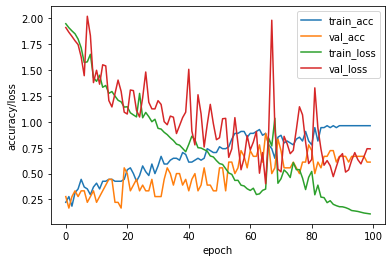

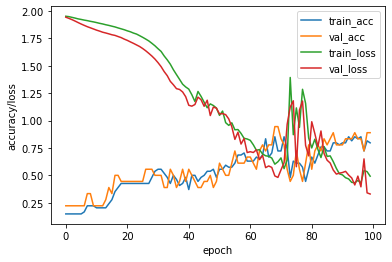

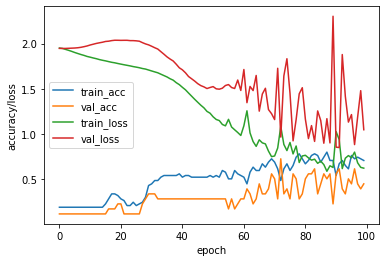

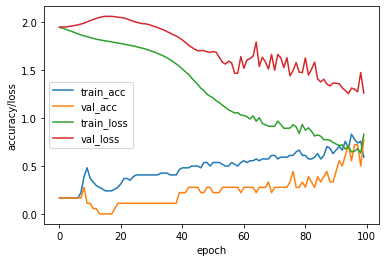

In [51]:
for history in histories3:
    pp.plot_hist(history)

<h2> Expriment4:</h2>

In [52]:
net4 = models.Sequential()
net4.add(layers.GRU(240, return_sequences = True, input_shape=(480,6)))
net4.add(layers.GRU(240))
net4.add(layers.Dense(240,  activation = 'relu'))
net4.add(layers.Dense(120,  activation = 'relu'))
net4.add(layers.Dense(7, activation = 'softmax'))
net4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 480, 240)          177840    
_________________________________________________________________
gru_20 (GRU)                 (None, 240)               346320    
_________________________________________________________________
dense_27 (Dense)             (None, 240)               57840     
_________________________________________________________________
dense_28 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 847       
Total params: 611,767
Trainable params: 611,767
Non-trainable params: 0
_________________________________________________________________


In [53]:
net4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net4.save_weights('net4.h5')  # each split will start with same weights so can directly compare results

histories4 = []
results_list4 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net4.load_weights('net4.h5')
    history = net4.fit(train_fold, train_tgt, epochs = 100, validation_data = (val_fold, val_tgt))

    histories4.append(history)
    
    
    results = net4.evaluate(test_data, test_labels)
    results_list4.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration4 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/100
54/54 [==============================] - 8s 156ms/step - loss: 1.9518 - accuracy: 0.0556 - val_loss: 1.9202 - val_accuracy: 0.2778
Epoch 2/100
54/54 [==============================] - 8s 140ms/step - loss: 1.9265 - accuracy: 0.0926 - val_loss: 1.8979 - val_accuracy: 0.2778
Epoch 3/100
54/54 [==============================] - 8s 139ms/step - loss: 1.9111 - accuracy: 0.1481 - val_loss: 1.8593 - val_accuracy: 0.2778
Epoch 4/100
54/54 [==============================] - 8s 141ms/step - loss: 1.8795 - accuracy: 0.1481 - val_loss: 1.8281 - val_accuracy: 0.2778
Epoch 5/100
54/54 [==============================] - 8s 139ms/step - loss: 1.8299 - accuracy: 0.1481 - val_loss: 1.7882 - val_accuracy: 0.1111
Epoch 6/100
54/54 [==============================] - 8s 140ms/step - loss: 1.7759 - accuracy: 0.1852 - val_loss: 1.7198 - val_accuracy: 0.1111
Epoch 7/100
54/54 [==============================] - 8s 139ms/step - loss: 1.6604 - accuracy: 0.

54/54 [==============================] - 8s 142ms/step - loss: 0.6298 - accuracy: 0.7593 - val_loss: 1.0422 - val_accuracy: 0.6111
Epoch 58/100
54/54 [==============================] - 8s 142ms/step - loss: 0.5933 - accuracy: 0.7407 - val_loss: 0.9328 - val_accuracy: 0.5000
Epoch 59/100
54/54 [==============================] - 8s 142ms/step - loss: 0.5676 - accuracy: 0.6852 - val_loss: 0.9906 - val_accuracy: 0.3889
Epoch 60/100
54/54 [==============================] - 8s 140ms/step - loss: 0.5925 - accuracy: 0.7222 - val_loss: 1.0263 - val_accuracy: 0.5000
Epoch 61/100
54/54 [==============================] - 8s 140ms/step - loss: 0.5787 - accuracy: 0.7778 - val_loss: 1.4670 - val_accuracy: 0.3333
Epoch 62/100
54/54 [==============================] - 8s 142ms/step - loss: 0.5307 - accuracy: 0.7037 - val_loss: 1.1930 - val_accuracy: 0.3889
Epoch 63/100
54/54 [==============================] - 8s 141ms/step - loss: 0.4741 - accuracy: 0.7963 - val_loss: 0.7291 - val_accuracy: 0.6667
Epoch

54/54 [==============================] - 8s 141ms/step - loss: 1.8880 - accuracy: 0.1667 - val_loss: 1.8385 - val_accuracy: 0.2222
Epoch 14/100
54/54 [==============================] - 8s 142ms/step - loss: 1.8821 - accuracy: 0.1667 - val_loss: 1.8250 - val_accuracy: 0.2222
Epoch 15/100
54/54 [==============================] - 8s 141ms/step - loss: 1.8760 - accuracy: 0.1667 - val_loss: 1.8104 - val_accuracy: 0.2222
Epoch 16/100
54/54 [==============================] - 8s 141ms/step - loss: 1.8699 - accuracy: 0.1667 - val_loss: 1.7975 - val_accuracy: 0.2222
Epoch 17/100
54/54 [==============================] - 8s 141ms/step - loss: 1.8614 - accuracy: 0.1667 - val_loss: 1.7827 - val_accuracy: 0.2222
Epoch 18/100
54/54 [==============================] - 8s 140ms/step - loss: 1.8488 - accuracy: 0.1667 - val_loss: 1.7687 - val_accuracy: 0.2222
Epoch 19/100
54/54 [==============================] - 8s 143ms/step - loss: 1.8385 - accuracy: 0.1667 - val_loss: 1.7507 - val_accuracy: 0.2222
Epoch

Epoch 70/100
54/54 [==============================] - 8s 141ms/step - loss: 0.4665 - accuracy: 0.7222 - val_loss: 0.5191 - val_accuracy: 0.8333
Epoch 71/100
54/54 [==============================] - 8s 142ms/step - loss: 0.4526 - accuracy: 0.7593 - val_loss: 0.4966 - val_accuracy: 0.7778
Epoch 72/100
54/54 [==============================] - 8s 140ms/step - loss: 0.4253 - accuracy: 0.8333 - val_loss: 0.5405 - val_accuracy: 0.8333
Epoch 73/100
54/54 [==============================] - 8s 140ms/step - loss: 0.4368 - accuracy: 0.7593 - val_loss: 0.5765 - val_accuracy: 0.7778
Epoch 74/100
54/54 [==============================] - 8s 141ms/step - loss: 0.4030 - accuracy: 0.7963 - val_loss: 0.5354 - val_accuracy: 0.8333
Epoch 75/100
54/54 [==============================] - 8s 141ms/step - loss: 0.3757 - accuracy: 0.8333 - val_loss: 0.5014 - val_accuracy: 0.8333
Epoch 76/100
54/54 [==============================] - 8s 141ms/step - loss: 0.3737 - accuracy: 0.8519 - val_loss: 0.4423 - val_accuracy:

Epoch 26/100
54/54 [==============================] - 8s 141ms/step - loss: 1.7807 - accuracy: 0.2037 - val_loss: 2.1191 - val_accuracy: 0.1111
Epoch 27/100
54/54 [==============================] - 8s 141ms/step - loss: 1.7751 - accuracy: 0.2037 - val_loss: 2.1192 - val_accuracy: 0.1111
Epoch 28/100
54/54 [==============================] - 8s 140ms/step - loss: 1.7710 - accuracy: 0.2037 - val_loss: 2.1154 - val_accuracy: 0.1111
Epoch 29/100
54/54 [==============================] - 8s 142ms/step - loss: 1.7649 - accuracy: 0.2037 - val_loss: 2.1090 - val_accuracy: 0.1111
Epoch 30/100
54/54 [==============================] - 8s 141ms/step - loss: 1.7597 - accuracy: 0.2037 - val_loss: 2.1013 - val_accuracy: 0.1111
Epoch 31/100
54/54 [==============================] - 8s 142ms/step - loss: 1.7542 - accuracy: 0.2037 - val_loss: 2.0923 - val_accuracy: 0.1111
Epoch 32/100
54/54 [==============================] - 8s 144ms/step - loss: 1.7489 - accuracy: 0.2037 - val_loss: 2.0793 - val_accuracy:

Epoch 83/100
54/54 [==============================] - 8s 147ms/step - loss: 1.0411 - accuracy: 0.5741 - val_loss: 1.0272 - val_accuracy: 0.6111
Epoch 84/100
54/54 [==============================] - 8s 146ms/step - loss: 0.9035 - accuracy: 0.5926 - val_loss: 1.0277 - val_accuracy: 0.5556
Epoch 85/100
54/54 [==============================] - 8s 148ms/step - loss: 0.7850 - accuracy: 0.7037 - val_loss: 1.8156 - val_accuracy: 0.3889
Epoch 86/100
54/54 [==============================] - 8s 143ms/step - loss: 1.1831 - accuracy: 0.5556 - val_loss: 1.8771 - val_accuracy: 0.2222
Epoch 87/100
54/54 [==============================] - 8s 141ms/step - loss: 1.0225 - accuracy: 0.5556 - val_loss: 1.5231 - val_accuracy: 0.3333
Epoch 88/100
54/54 [==============================] - 8s 146ms/step - loss: 0.8397 - accuracy: 0.5741 - val_loss: 1.3295 - val_accuracy: 0.3333
Epoch 89/100
54/54 [==============================] - 8s 141ms/step - loss: 0.9000 - accuracy: 0.6111 - val_loss: 1.0980 - val_accuracy:

Epoch 39/100
54/54 [==============================] - 7s 139ms/step - loss: 1.2869 - accuracy: 0.5370 - val_loss: 1.5671 - val_accuracy: 0.2778
Epoch 40/100
54/54 [==============================] - 8s 140ms/step - loss: 1.2405 - accuracy: 0.5000 - val_loss: 1.6037 - val_accuracy: 0.2222
Epoch 41/100
54/54 [==============================] - 8s 140ms/step - loss: 1.2169 - accuracy: 0.5000 - val_loss: 1.5702 - val_accuracy: 0.2778
Epoch 42/100
54/54 [==============================] - 8s 140ms/step - loss: 1.1739 - accuracy: 0.5185 - val_loss: 1.5423 - val_accuracy: 0.2778
Epoch 43/100
54/54 [==============================] - 8s 140ms/step - loss: 1.1519 - accuracy: 0.5000 - val_loss: 1.5612 - val_accuracy: 0.2778
Epoch 44/100
54/54 [==============================] - 8s 141ms/step - loss: 1.1222 - accuracy: 0.5185 - val_loss: 1.5337 - val_accuracy: 0.2778
Epoch 45/100
54/54 [==============================] - 8s 140ms/step - loss: 1.0859 - accuracy: 0.5000 - val_loss: 1.5159 - val_accuracy:

Epoch 96/100
54/54 [==============================] - 7s 139ms/step - loss: 0.6505 - accuracy: 0.7037 - val_loss: 1.5451 - val_accuracy: 0.5000
Epoch 97/100
54/54 [==============================] - 8s 140ms/step - loss: 0.6624 - accuracy: 0.6481 - val_loss: 1.5614 - val_accuracy: 0.3889
Epoch 98/100
54/54 [==============================] - 7s 139ms/step - loss: 0.6458 - accuracy: 0.6481 - val_loss: 1.5990 - val_accuracy: 0.4444
Epoch 99/100
54/54 [==============================] - 8s 140ms/step - loss: 0.6157 - accuracy: 0.7037 - val_loss: 1.7249 - val_accuracy: 0.4444
Epoch 100/100
15/15 [==============================] - 1s 47ms/step
[1.7834725379943848, 0.6000000238418579]


In [54]:
avg = np.mean(results_list4, axis=0)
std_dev = np.std(results_list4, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration4))

Average loss and accuracy scores were:  [1.28612733 0.65000002]
Standard deviation for loss & accuracy:  [0.33392182 0.02886751]
Duration in seconds:  3065


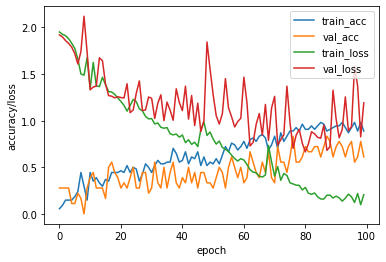

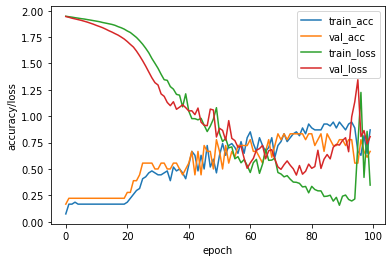

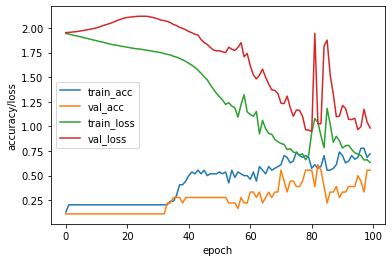

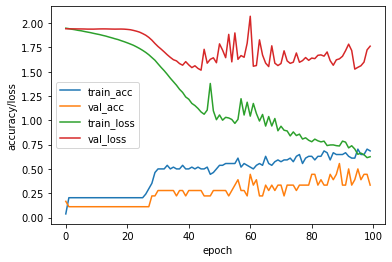

In [55]:
for history in histories4:
    pp.plot_hist(history)

In [14]:
#net4.save('enb38-4.h5')

<h2> Expriment5:</h2>

In [17]:
net5 = models.Sequential()
net5.add(layers.Dense((480), input_shape = (480,6)))
net5.add(layers.Flatten())
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(360,activation='relu'))
net5.add(layers.Dense(240,activation='relu'))
net5.add(layers.Dense(7, activation = 'softmax'))
net5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 480, 480)          3360      
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 360)               82944360  
_________________________________________________________________
dense_23 (Dense)             (None, 360)               129960    
_________________________________________________________________
dense_24 (Dense)             (None, 240)               86640     
_________________________________________________________________
dense_25 (Dense)             (None, 7)                 1687      
Total params: 83,166,007
Trainable params: 83,166,007
Non-trainable params: 0
__________________________________________

In [18]:
net5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
net5.save_weights('net5.h5')  # each split will start with same weights so can directly compare results

histories5 = []
results_list5 = []
index = 0
fold = val_split_size



start = tm.time()

for i in range (k):
    print(i)
    val_fold = train_data[index:fold]
    train_fold = np.delete(train_data, np.s_[index:fold],0)

    val_tgt = train_labels[index:fold]
    train_tgt = np.delete(train_labels, np.s_[index:fold])
    
    
    net5.load_weights('net5.h5')
    history = net5.fit(train_fold, train_tgt, epochs = 25, validation_data = (val_fold, val_tgt))

    histories5.append(history)
    
    
    results = net5.evaluate(test_data, test_labels)
    results_list5.append(results)
    print(results)
    
    index = index + val_split_size
    fold = fold + val_split_size

finish = tm.time()
duration5 = finish - start

0
Train on 54 samples, validate on 18 samples
Epoch 1/25
54/54 [==============================] - 3s 47ms/step - loss: 4.5390 - accuracy: 0.1111 - val_loss: 6.6134 - val_accuracy: 0.2222
Epoch 2/25
54/54 [==============================] - 2s 40ms/step - loss: 9.2058 - accuracy: 0.1667 - val_loss: 10.2480 - val_accuracy: 0.0556
Epoch 3/25
54/54 [==============================] - 2s 40ms/step - loss: 8.7686 - accuracy: 0.1481 - val_loss: 3.5982 - val_accuracy: 0.2778
Epoch 4/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9425 - accuracy: 0.2778 - val_loss: 4.5796 - val_accuracy: 0.3889
Epoch 5/25
54/54 [==============================] - 2s 40ms/step - loss: 3.9363 - accuracy: 0.3519 - val_loss: 2.5044 - val_accuracy: 0.6111
Epoch 6/25
54/54 [==============================] - 2s 39ms/step - loss: 2.1369 - accuracy: 0.4444 - val_loss: 1.7686 - val_accuracy: 0.2222
Epoch 7/25
54/54 [==============================] - 2s 40ms/step - loss: 1.5409 - accuracy: 0.3704 - val_lo

In [19]:
avg = np.mean(results_list5, axis=0)
std_dev = np.std(results_list5, axis=0)
print('Average loss and accuracy scores were: ', avg)
print('Standard deviation for loss & accuracy: ', std_dev)
print('Duration in seconds: ', int(duration5))

Average loss and accuracy scores were:  [0.51167821 0.78333335]
Standard deviation for loss & accuracy:  [0.07887788 0.07264831]
Duration in seconds:  218
